In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:

df = pd.read_csv('/content/drive/My Drive/datasets/diabetes.csv')

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

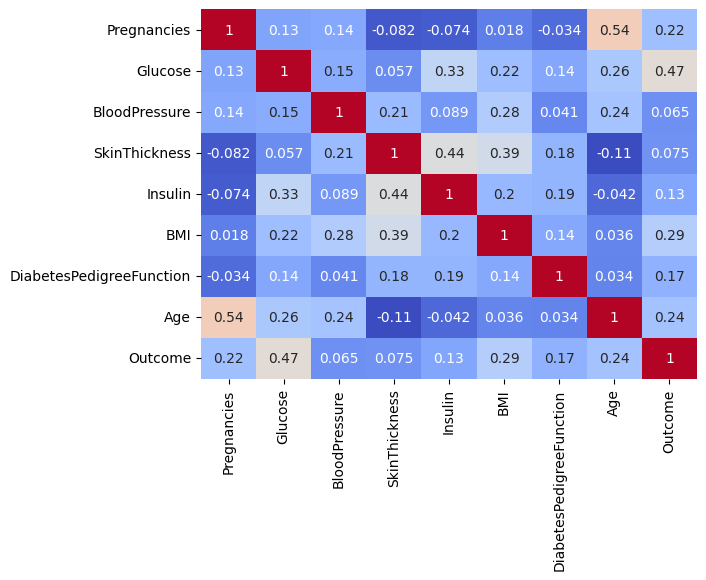

In [ ]:
sns.heatmap(df.corr(),cbar=False,cmap='coolwarm',annot=True)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
class_counts = df['Outcome'].value_counts()

# Calculate the class imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()
imbalance_ratio

0.536

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

0

<Axes: xlabel='BMI', ylabel='Count'>

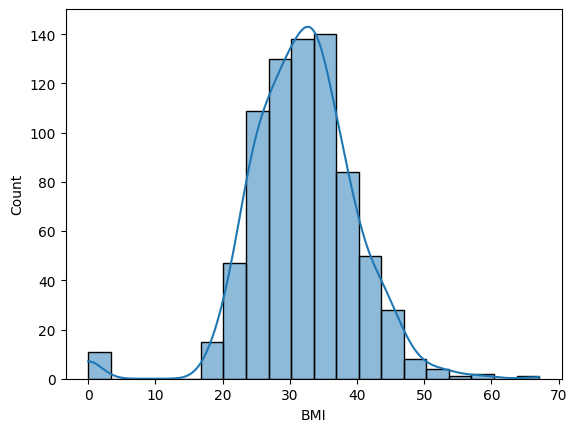

In [ ]:
sns.histplot(df['BMI'], kde=True,bins=20)

<Axes: xlabel='BloodPressure', ylabel='Count'>

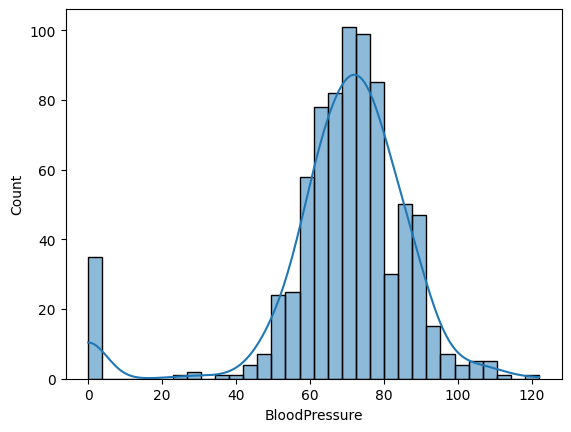

In [ ]:
sns.histplot(df['BloodPressure'], kde=True)

<Axes: xlabel='Glucose', ylabel='Count'>

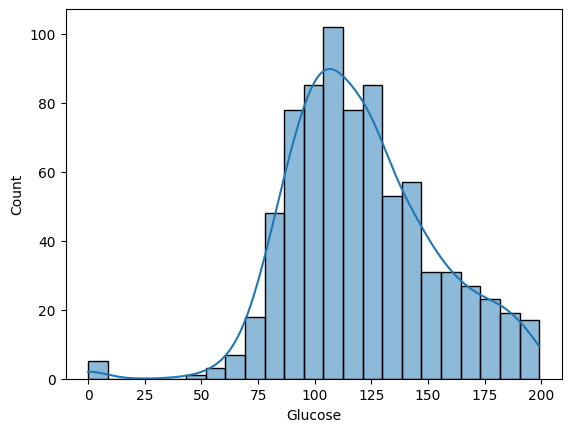

In [ ]:
sns.histplot(df['Glucose'], kde=True)

<Axes: xlabel='Age', ylabel='Count'>

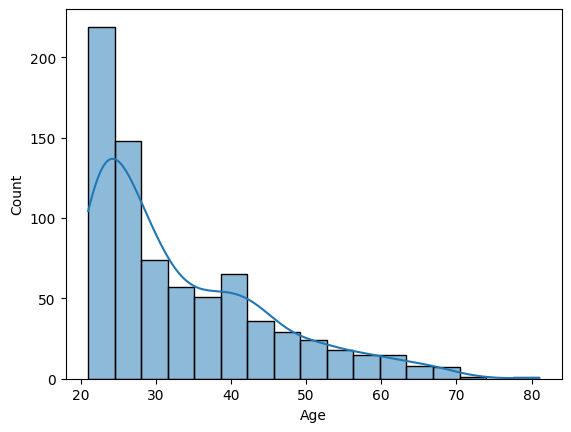

In [ ]:
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Outcome', ylabel='count'>

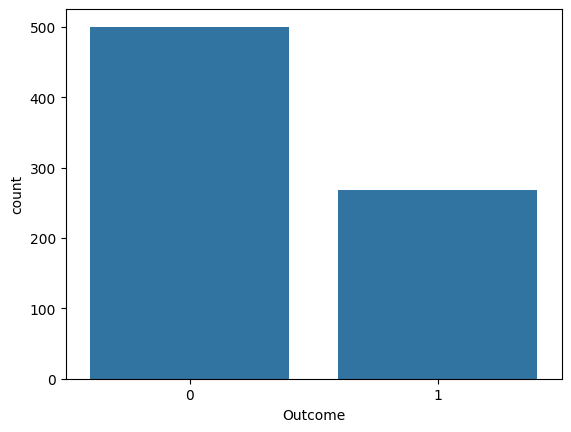

In [ ]:
sns.countplot(data=df, x='Outcome')

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape[0]

129

In [ ]:
outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0


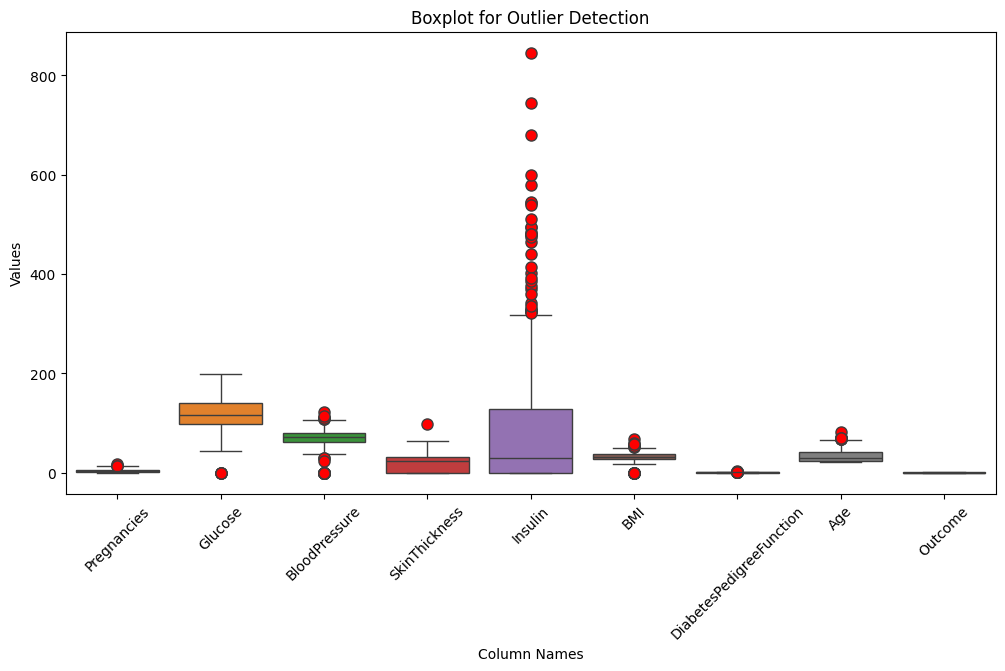

In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create boxplots for each numeric column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.xticks(rotation=45)
plt.title('Boxplot for Outlier Detection')
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.show()

In [ ]:
# Remove outliers
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1=df_clean.copy()
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming `data` is a pandas DataFrame
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)  # Output is a NumPy array

# Create a new DataFrame using the scaled data and original column names
data = pd.DataFrame(scaled_data, columns=df1.columns)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.484277,0.493261,0.644444,1.0
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.264151,0.245283,0.222222,0.0
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.160377,0.533693,0.244444,1.0
3,0.076923,0.292208,0.411765,0.383333,0.295597,0.311321,0.079964,0.000000,0.0
4,0.384615,0.467532,0.529412,0.000000,0.000000,0.232704,0.110512,0.200000,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
X = data.drop(columns=['Outcome'])
y = data['Outcome']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}
# Define the parameter grids for each model
param_grid = {
    "Logistic Regression": {'C': [0.1, 1, 10]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    "Gradient Boosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01]},
    "Support Vector Machine": {'C': [0.1, 1, 10], 'gamma': ['auto', 'scale']}
}

scores=[]
# Perform GridSearchCV for each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, return_train_score=False)
    grid_search.fit(X_train, y_train)
    scores.append({
        'model':name,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    })


In [ ]:
scoresdf = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scoresdf

,model,best_score,best_params
0,Logistic Regression,0.786769,{'C': 10}
1,Decision Tree,0.712336,"{'max_depth': 20, 'min_samples_split': 2}"
2,Random Forest,0.786750,"{'max_depth': 10, 'min_samples_split': 5, 'n_e..."
3,Gradient Boosting,0.778888,"{'learning_rate': 0.05, 'n_estimators': 100}"
4,Support Vector Machine,0.786808,"{'C': 10, 'gamma': 'auto'}"


In [ ]:
lr=LogisticRegression(C=10)
lr.fit(X_train,y_train)

LogisticRegression(C=10)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.78125
Precision: 0.7
Recall: 0.525
F1 Score: 0.6
ROC-AUC Score: 0.7113636363636363


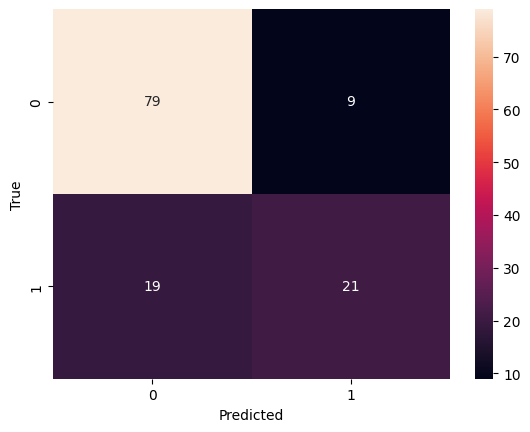

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import pickle
with open('logregmodel.pkl','wb') as file:
  pickle.dump(lr,file)

In [ ]:
from sklearn.pipeline import Pipeline
from joblib import dump
# Define a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression(C=10))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Save the pipeline
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']